Walid Rahman
UNI: wr2255
MECEE4520

HW1: Boston Housing Price Predictions

Questions:
1. (25 pts) Describe the data:
    1. What missing values are there?
    2. What are the summary statistics of the numerical features?
    3. What do the distributions of the features look like?
2. (25 pts) What features are most correlated with housing price?
3. (25 pts) Generate a new feature based on the existing dataset that you think would help explain housing prices and plot its relationship with housing price.
4. (25 pts) With scikit-learn, develop a model with the training data and make predictions on the test data. Plot your predictions.

I answer these questions step by step as I process the dataset. 

Just some info about the parameters in the dataframe according to Kaggle.

crim
per capita crime rate by town.

zn
proportion of residential land zoned for lots over 25,000 sq.ft.

indus
proportion of non-retail business acres per town.

chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox
nitrogen oxides concentration (parts per 10 million).

rm
average number of rooms per dwelling.

age
proportion of owner-occupied units built prior to 1940.

dis
weighted mean of distances to five Boston employment centres.

rad
index of accessibility to radial highways.

tax
full-value property-tax rate per \$10,000.

ptratio
pupil-teacher ratio by town.

black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat
lower status of the population (percent).

medv
median value of owner-occupied homes in \$1000s.


In [142]:
'''The first step is to open the datasets. The training and testing set are
already split. We also want to import all necessary libraries at the start.'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Matlab format for the notebook
%matplotlib inline

#Load dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [143]:
'''Question 1.1: Determining the presenece of missing values'''

#Let us see if there is any missing values in our training data
train_data.isnull().values.any()

False

In [145]:
test_data.isnull().values.any()

False

Answer (1.1): As shown above, there are no missing values in the dataset.

In [146]:
#We don't really care about the ID column since it just identifies 
#each data point and doesn't offer much other info.

comp_cols = []
for column in train_data.columns:
    comp_cols.append(column)
comp_cols = comp_cols[1:]
print(comp_cols) #a list of strings for important features to subset the dataframe
print("There are " + str(len(comp_cols)) + ' features in this dataset.'"")

['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']
There are 14 features in this dataset.


In [147]:
#I'm going to store the values for all columns into list for future use

crim = train_data['crim'].tolist()
zn = train_data['zn'].tolist()
indus = train_data['indus'].tolist()
chas = train_data['chas'].tolist()
nox = train_data['nox'].tolist()
rm = train_data['rm'].tolist()
age = train_data['age'].tolist()
dis = train_data['dis'].tolist()
rad = train_data['rad'].tolist()
tax = train_data['tax'].tolist()
ptratio = train_data['ptratio'].tolist()
black = train_data['black'].tolist()
lstat = train_data['lstat'].tolist()
medv = train_data['medv'].tolist()

In [148]:
'''Question 1.2: Let us determine the summary statistics of the numerical 
   features'''

#I created a function to determine the relevant statsitics.
def statmaker(feature):
    sns.set(color_codes=True)
    min_val = np.min(feature)
    max_val = np.max(feature)
    mean_val = np.mean(feature)
    med_val = np.median(feature)
    std_val = np.std(feature)    
    print ("Minimum value: {:,.5f}".format(min_val))
    print ("Maximum value: {:,.5f}".format(max_val))
    print ("Mean value: {:,.5f}".format(mean_val))
    print ("Median value: {:,.5f}".format(med_val))
    print ("Standard deviation: {:,.5f}".format(std_val))
    
print("Here are the statistics for crim")
statmaker(crim) 
print('')
print("Here are the statistics for zn")
statmaker(zn) 
print('')
print("Here are the statistics for indus")
statmaker(indus) 
print('')
print("Here are the statistics for chas")
statmaker(chas) 
print('')
print("Here are the statistics for nox")
statmaker(nox) 
print('')
print("Here are the statistics for rm")
statmaker(rm) 
print('')
print("Here are the statistics for age")
statmaker(age) 
print('')
print("Here are the statistics for dis")
statmaker(dis) 
print('')
print("Here are the statistics for rad")
statmaker(rad) 
print('')
print("Here are the statistics for tax")
statmaker(tax) 
print('')
print("Here are the statistics for ptratio")
statmaker(ptratio) 
print('')
print("Here are the statistics for black")
statmaker(black) 
print('')
print("Here are the statistics for lstat")
statmaker(lstat) 
print('')
print("Here are the statistics for medv. Note that they wre in the 1000s in reality.")
statmaker(medv) 

Here are the statistics for crim
Minimum value: 0.00632
Maximum value: 73.53410
Mean value: 3.36034
Median value: 0.26169
Standard deviation: 7.34122

Here are the statistics for zn
Minimum value: 0.00000
Maximum value: 100.00000
Mean value: 10.68919
Median value: 0.00000
Standard deviation: 22.64069

Here are the statistics for indus
Minimum value: 0.74000
Maximum value: 27.74000
Mean value: 11.29348
Median value: 9.90000
Standard deviation: 6.98761

Here are the statistics for chas
Minimum value: 0.00000
Maximum value: 1.00000
Mean value: 0.06006
Median value: 0.00000
Standard deviation: 0.23760

Here are the statistics for nox
Minimum value: 0.38500
Maximum value: 0.87100
Mean value: 0.55714
Median value: 0.53800
Standard deviation: 0.11478

Here are the statistics for rm
Minimum value: 3.56100
Maximum value: 8.72500
Mean value: 6.26562
Median value: 6.20200
Standard deviation: 0.70289

Here are the statistics for age
Minimum value: 6.00000
Maximum value: 100.00000
Mean value: 68.22

In [149]:
#There is also a way to determine statistics in a pandas dataset.
statframe = train_data.describe()
statframe

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


Answer (1.2): The relevant statistics are shown in two different ways above.

Here are the distributions of each feature using histograms



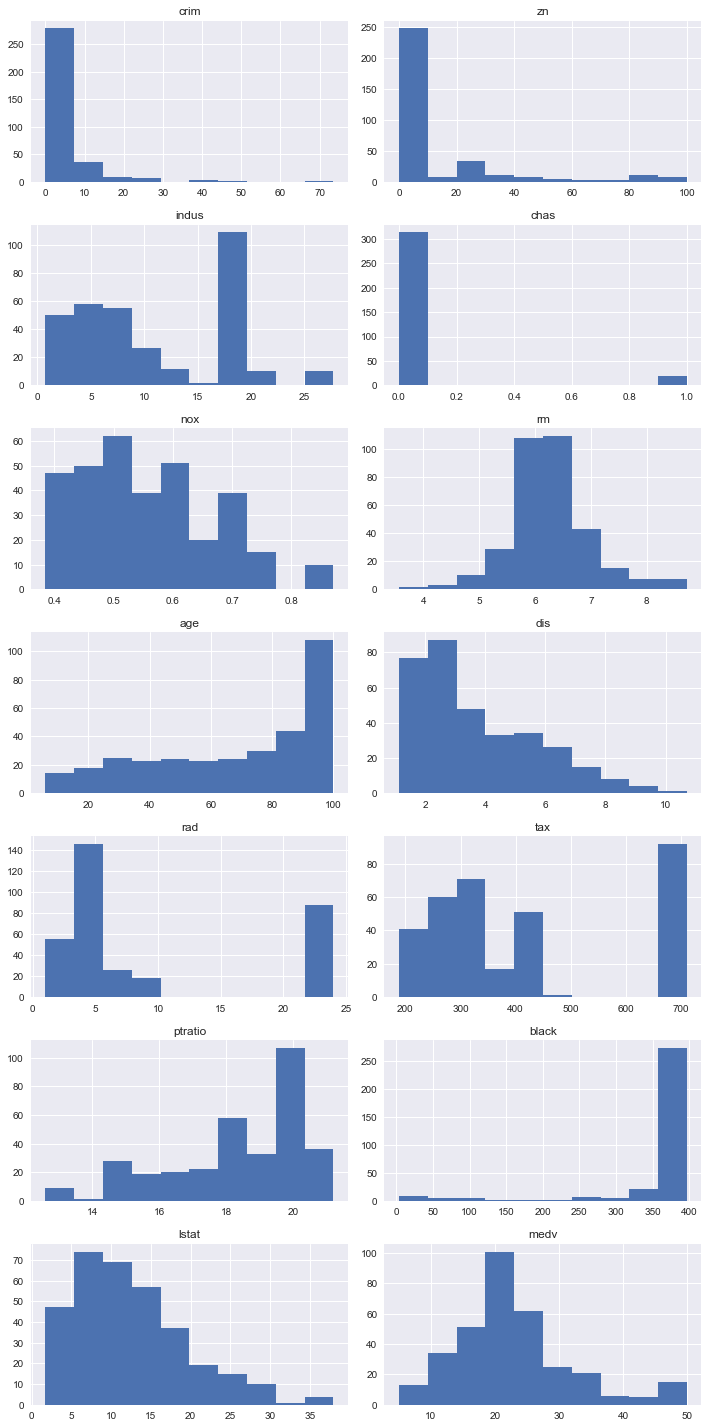

In [150]:
'''Question 1.3: Let us look at the distribution of the figures.'''

#A primary method to show the distribution of a set of data is a simple
#histogram. Here, I show the histogram using subplots.

print("Here are the distributions of each feature using histograms\n")

fig1, ax_plots = plt.subplots(7, 2)

ax_plots[0,0].hist(crim)
ax_plots[0,0].title.set_text('crim')

ax_plots[0,1].hist(zn)
ax_plots[0,1].title.set_text('zn')

ax_plots[1,0].hist(indus)
ax_plots[1,0].title.set_text('indus')

ax_plots[1,1].hist(chas)
ax_plots[1,1].title.set_text('chas')

ax_plots[2,0].hist(nox)
ax_plots[2,0].title.set_text('nox')

ax_plots[2,1].hist(rm)
ax_plots[2,1].title.set_text('rm')

ax_plots[3,0].hist(age)
ax_plots[3,0].title.set_text('age')

ax_plots[3,1].hist(dis)
ax_plots[3,1].title.set_text('dis')

ax_plots[4,0].hist(rad)
ax_plots[4,0].title.set_text('rad')

ax_plots[4,1].hist(tax)
ax_plots[4,1].title.set_text('tax')

ax_plots[5,0].hist(ptratio)
ax_plots[5,0].title.set_text('ptratio')

ax_plots[5,1].hist(black)
ax_plots[5,1].title.set_text('black')

ax_plots[6,0].hist(lstat)
ax_plots[6,0].title.set_text('lstat')

ax_plots[6,1].hist(medv)
ax_plots[6,1].title.set_text('medv')

fig1.set_figheight(20)
fig1.set_figwidth(10)
fig1.tight_layout()

C:\Users\wr225\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\wr225\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\wr225\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\wr225\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\wr225\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

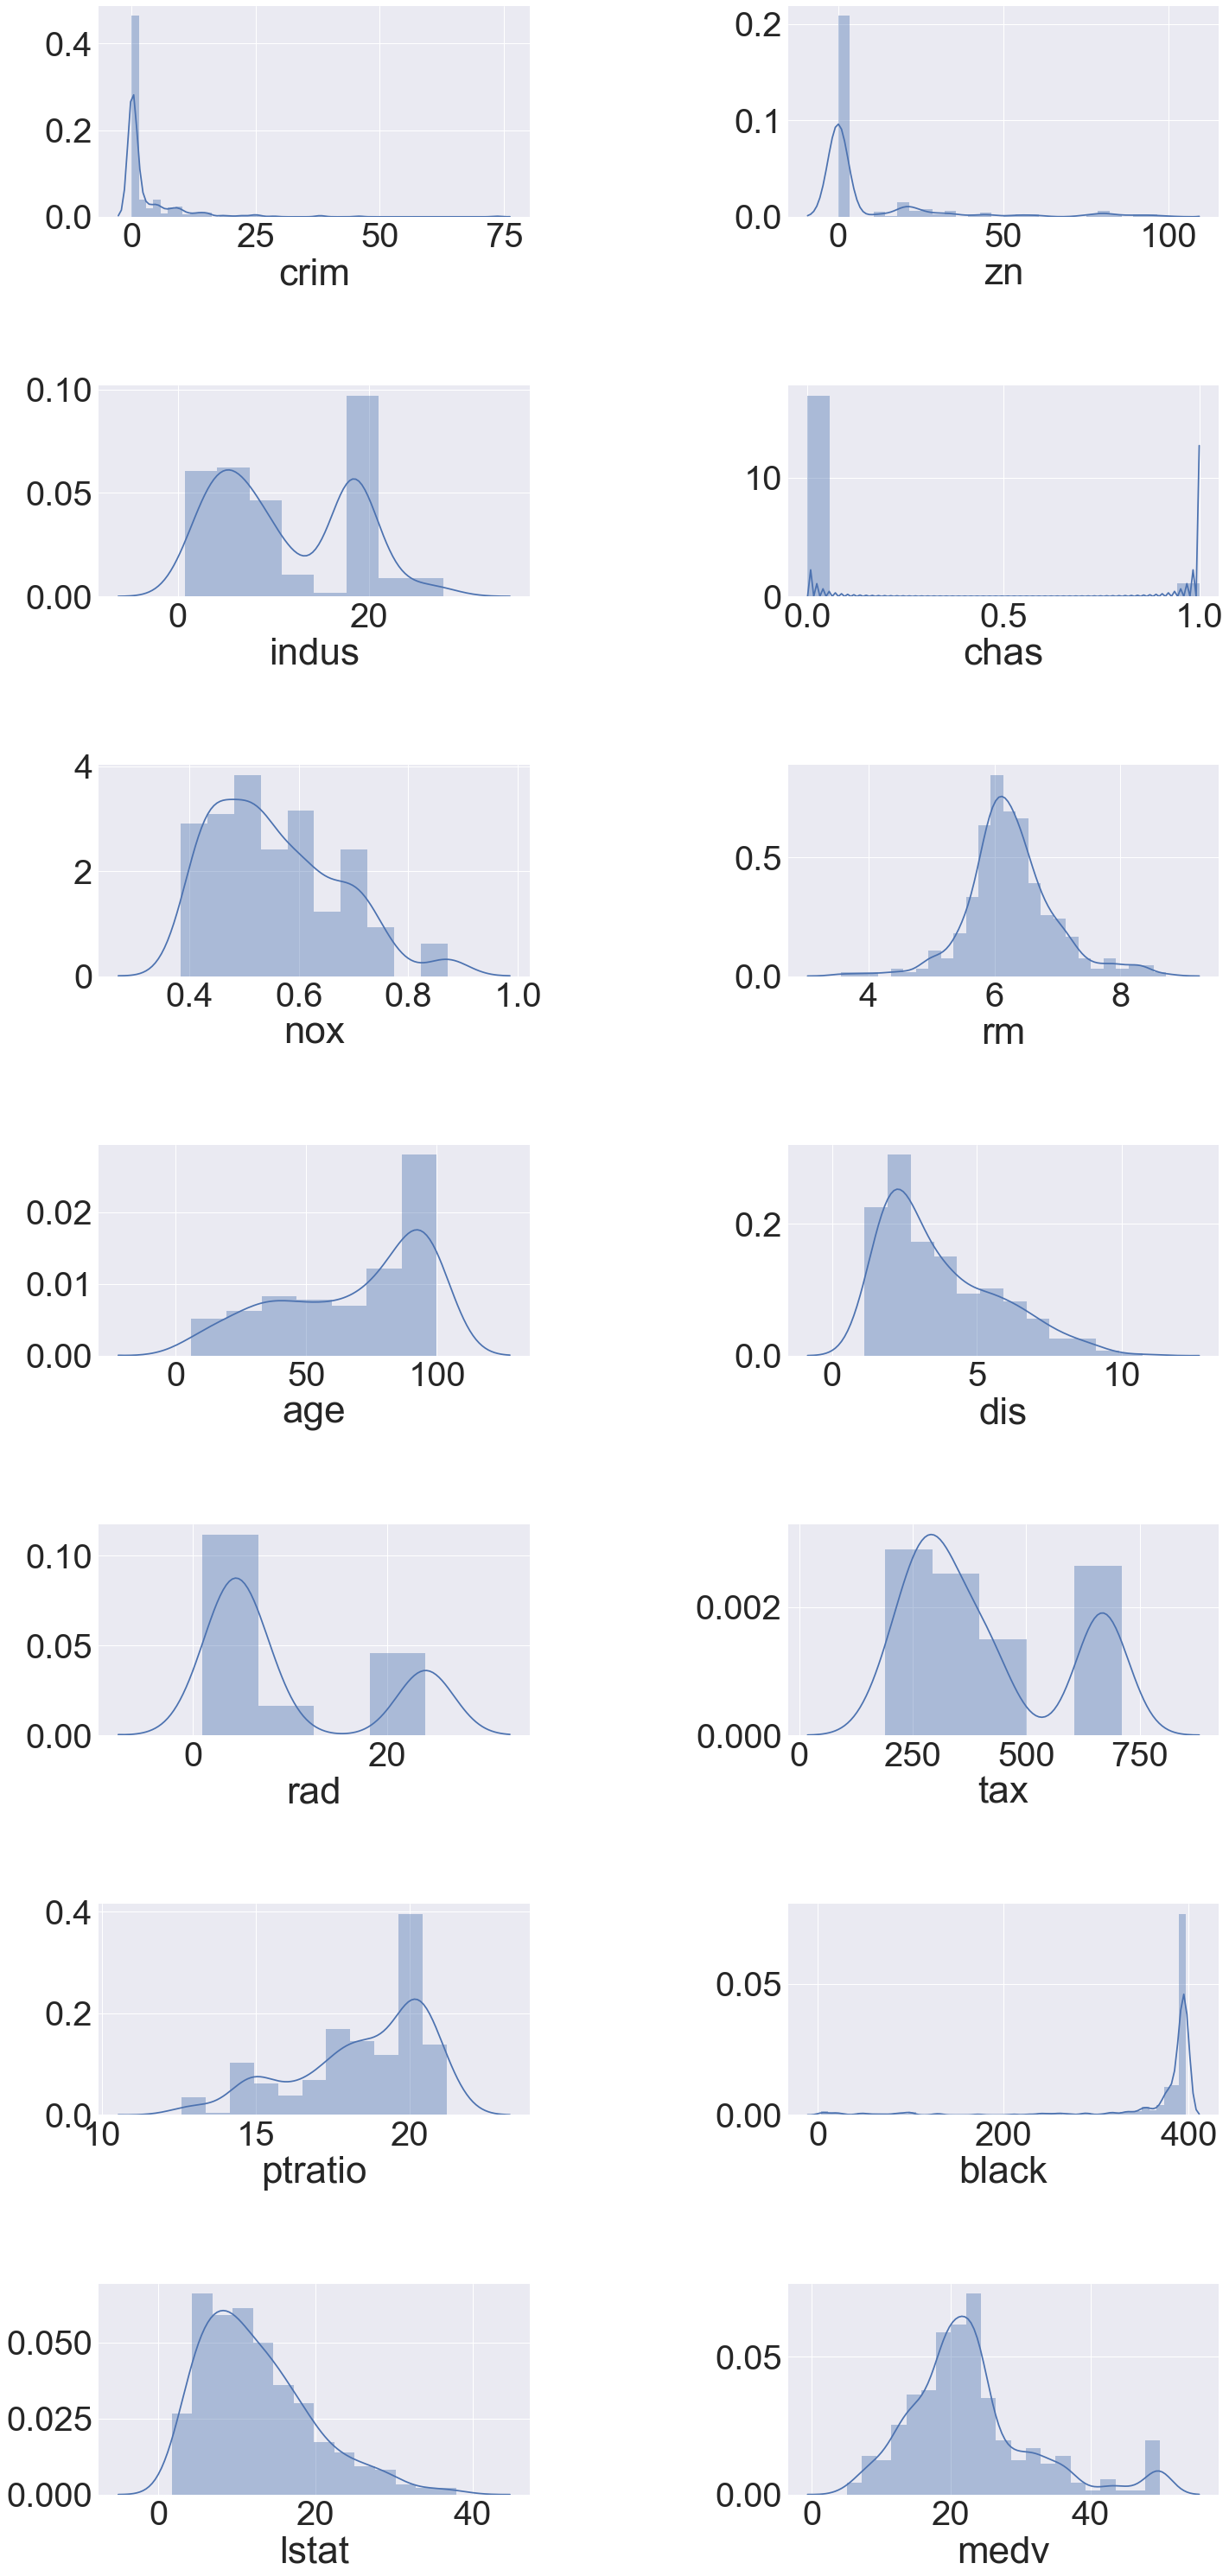

In [151]:
#Histograms are nice, but we can also use seaborn to find the corresponding
#univariate distribution distribution curve overlayed on the histogram. This 
#will allow us to better describe what kind of distribution each plot is.
sns.set(font_scale = 4)
df = train_data
fig, ax = plt.subplots(figsize=(18, 40), ncols=2, nrows=7)

plt.subplots_adjust(
    left    =  2, 
    bottom  =  3, 
    right   =  3, 
    top     =  4, 
    wspace  =  .6, 
    hspace  =  .8
)

sns.distplot(df['crim'], ax = ax[0][0])
sns.distplot(df['zn'], ax = ax[0][1])
sns.distplot(df['indus'], ax = ax[1][0])
sns.distplot(df['chas'], ax = ax[1][1])
sns.distplot(df['nox'], ax = ax[2][0])
sns.distplot(df['rm'], ax = ax[2][1])
sns.distplot(df['age'], ax = ax[3][0])
sns.distplot(df['dis'], ax = ax[3][1])
sns.distplot(df['rad'], ax = ax[4][0])
sns.distplot(df['tax'], ax = ax[4][1])
sns.distplot(df['ptratio'], ax = ax[5][0])
sns.distplot(df['black'], ax = ax[5][1])
sns.distplot(df['lstat'], ax = ax[6][0])
sns.distplot(df['medv'], ax = ax[6][1])


Answer (1.3): As you can see, we can now better determine what the distribution of each feature looks like. Let us list the most comparable distribution with each graph. 

crim: looks like a log normal distribution, but it is very skewed towards lower values.

zn: looks slike a gamma distribution.

indus:  looks like a bimodal distirbution.

chas: looks like a Bernoulli distribution.

nox: looks like a chi-square distribution.

rm: this is a beautiful Gaussian distribution.

age: looks almost like a bimodal distribution.

dis:  looks like a chi-square distribution.

rad: bimodal distribution.

tax: bimodal distirbution.

ptratio: multimodal or approximate gamma distribution.

black: gamma distribution.

lstat: log-normal distribution, or can be chi-square.

medv: looks like a Gaussian distribution for the most part.

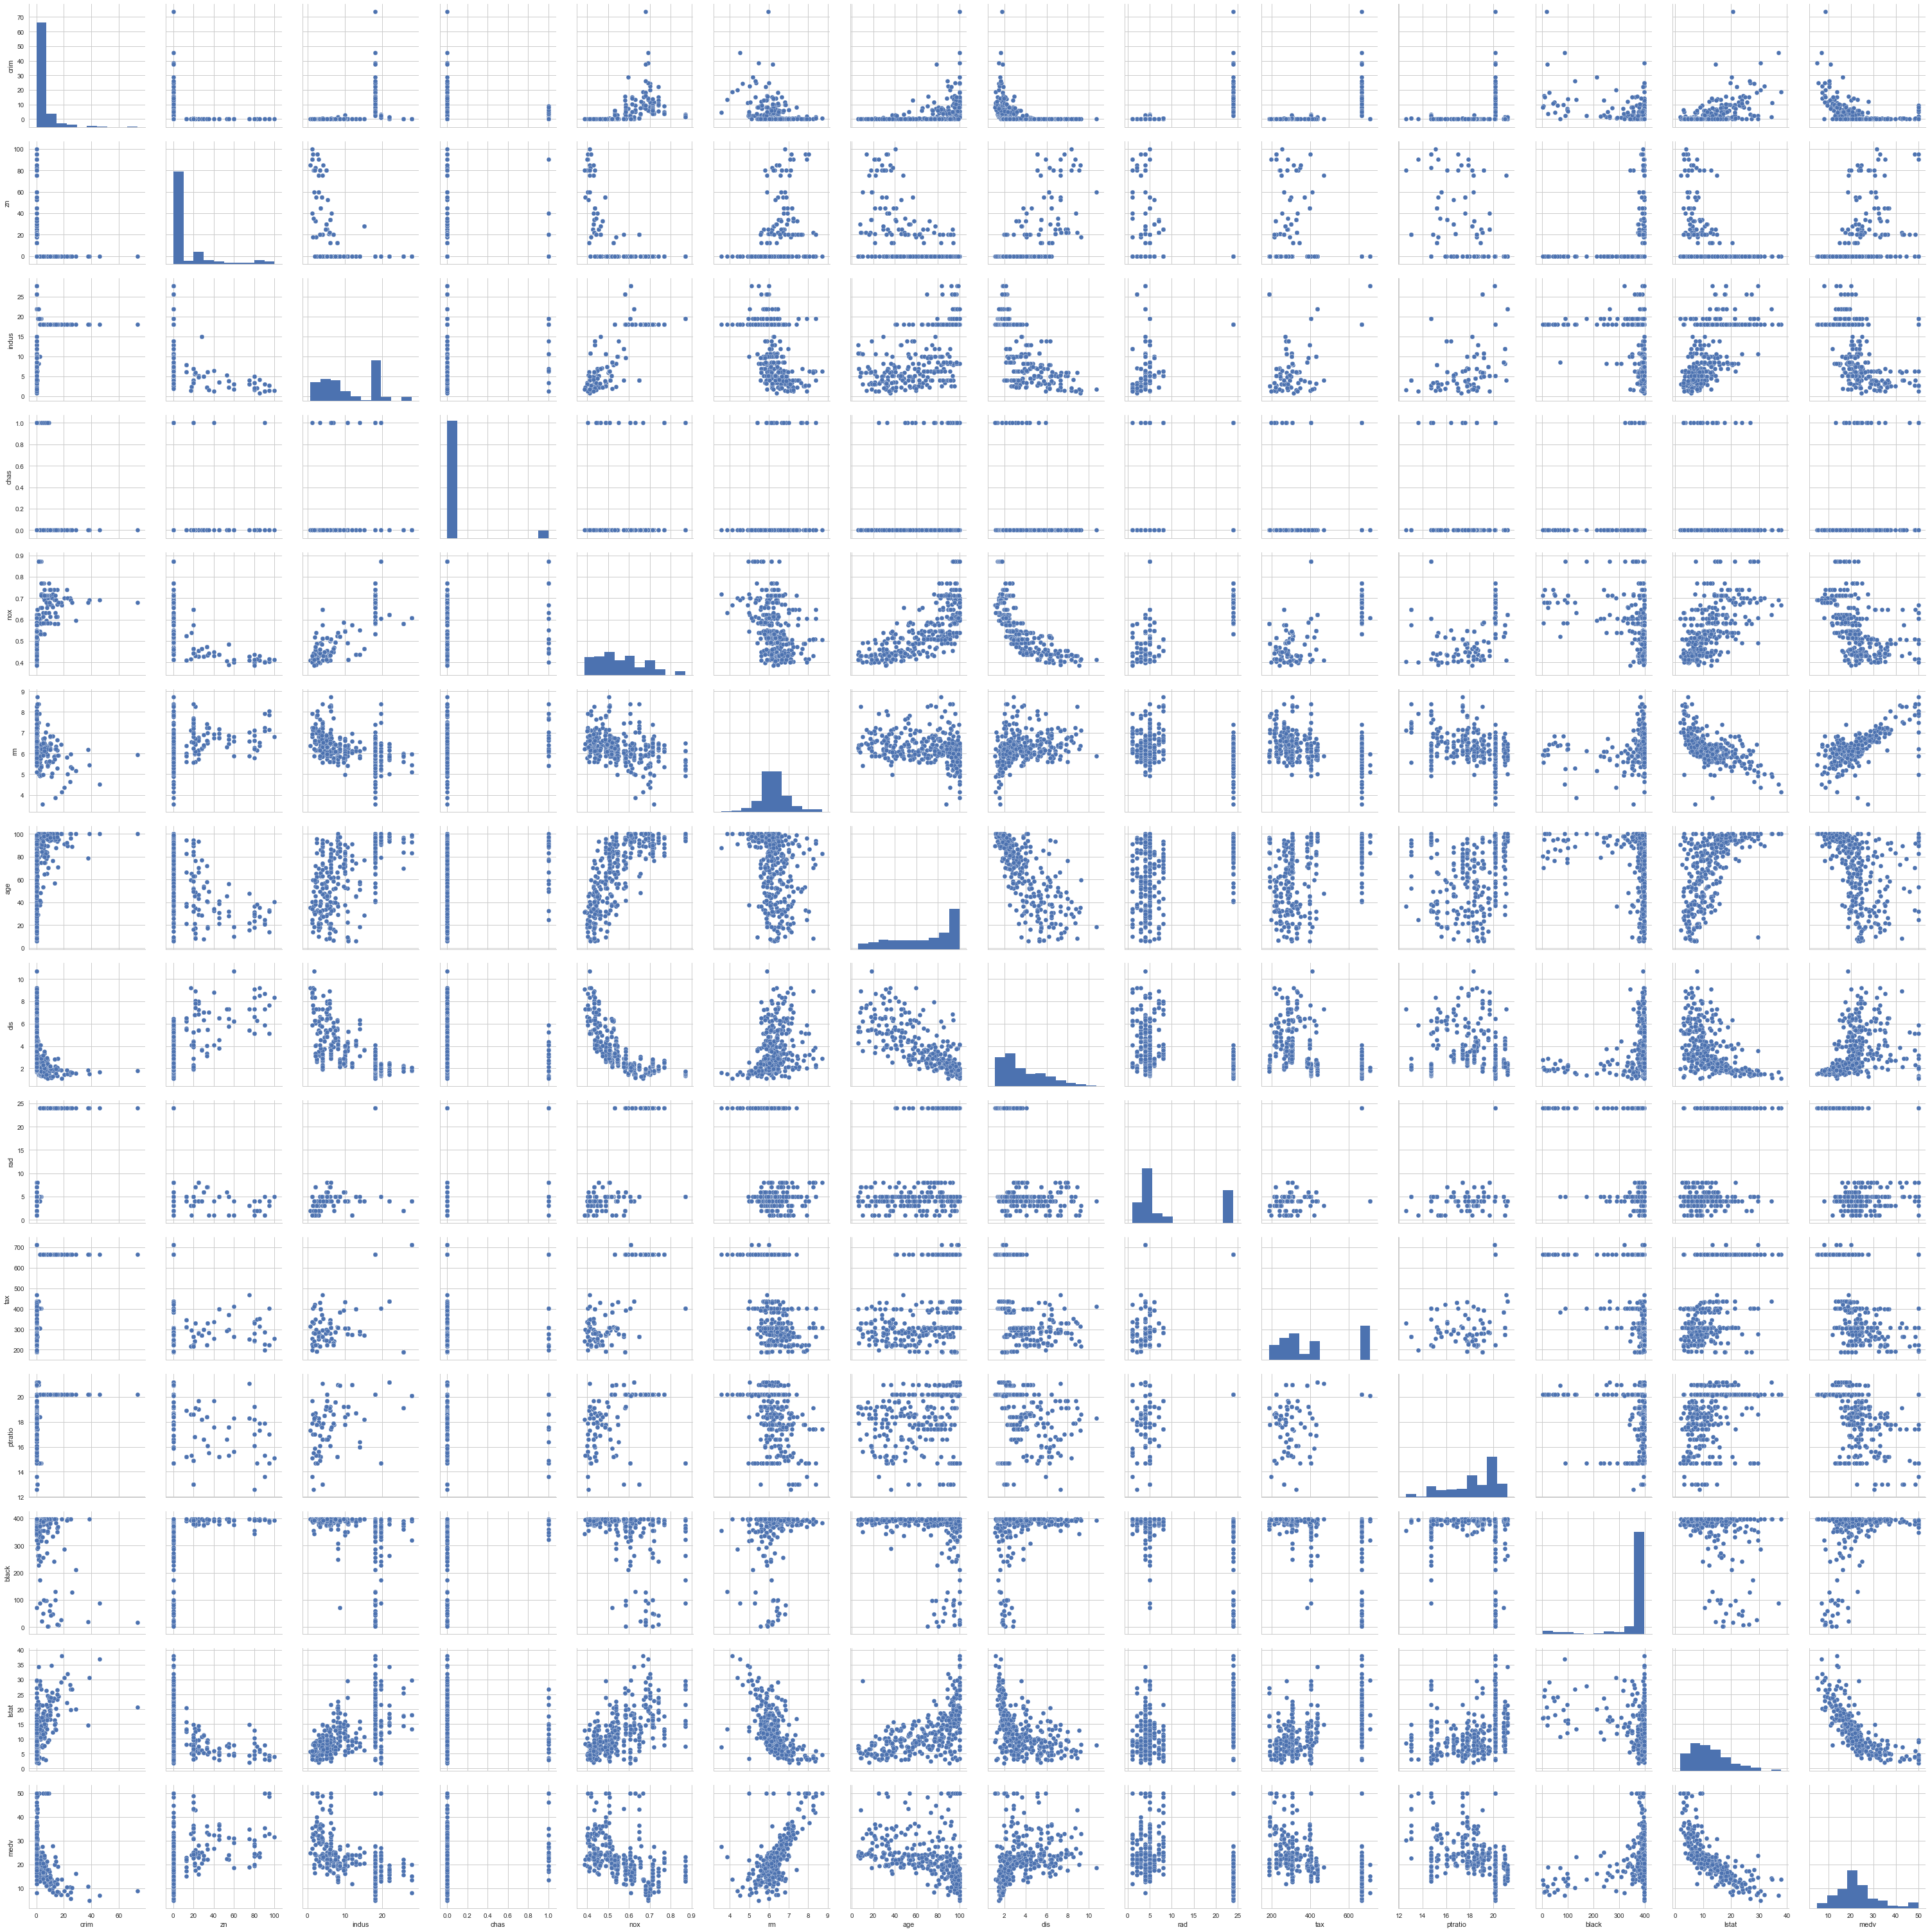

In [152]:
'''Determining correlations between features is key to understandig critical
relationships. In this section, we will look at different ways to find 
correlations between features.'''

#I want to determine the potential correlations we can use, and seaborn can help 
#us visualize that. 

#I know it's quite tedious to look through all these, but I want to look 
#for general correlations. Notice that the distributions are shown in the 
#diagnol axis.

sns.set(style = 'whitegrid', context ='notebook')
cols = comp_cols
sns.pairplot(train_data[comp_cols], size =  3)
plt.show()

In [153]:
#It seems that correlations exist between age/nox, dis/nox, rm/mdev, rm/lstat,
#dis/age, lstat/mdev. Therefore, we can filter the dataset to include only these
#fields

relevant_columns = ['nox', 'rm', 'age', 'dis', 'lstat', 'medv'] #to subset
train_data_mod = train_data[np.intersect1d(train_data.columns, relevant_columns)]
train_data_mod.head()

,age,dis,lstat,medv,nox,rm
0,65.2,4.0900,4.98,24.0,0.538,6.575
1,78.9,4.9671,9.14,21.6,0.469,6.421
2,45.8,6.0622,2.94,33.4,0.458,6.998
3,54.2,6.0622,5.33,36.2,0.458,7.147
4,66.6,5.5605,12.43,22.9,0.524,6.012


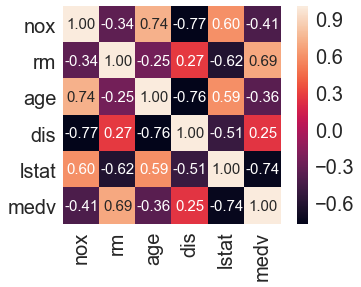

In [154]:
#We can also find the correlation coefficient for each relationship now that 
#we have honed in on the most relevant features.
cm = np.corrcoef(train_data_mod[relevant_columns].values.T)
sns.set(font_scale = 2.0)
heat = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                   annot_kws={'size':15}, yticklabels=relevant_columns, 
                   xticklabels = relevant_columns)
plt.show()


Answer (2): rm (average # of rooms per dwelling) and lstat (lower status of the population in percentage).

As we can see, we have some pretty decent correlations between the features.
Let's assume a good correlation is anything above a threshold of +/- .55.
There exists a (strong) negative corrleation between dis and nox, a negative correlation between rm and lstate, a negative correlation between age and dis, a negative correlation between lstat and medv and lstate and rm. There exists (strong) positive correlation between age and nox, between nox and lstat, rm and medv, age and lstat. Given these correlations, we can say that we can use linear
regression to model these housing price determinants/features. Other models may also be appropriate, but linear regression is quite simple.

But let's first contextualize this for what we want. We want to predict actual
housing prices.The correlations between medv and other features is what really
matters. So, lets focus on the correlation between medv and rm, and medv and lstat. They have the highest correlations both numerically and visually with medv. Anything else won't help us determine princes as they don't incorporate medv.

In [156]:
'''Question 3: Here, I generated a feature called space. 
It is the number of square feet of each home. I took the number of rooms
and took it to the .49 power times the number of rooms. I picked this value
after multiple attempts to find a good enough minimum value. As we can see below,
there exists a nice correlation between medv and space.'''

space = []
for i in rm:
    s = 10*(i**(.49*i))
    space.append(s)
   
train_data['space'] = space
train_data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,space
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,4315.743803
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,3474.979159
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,7896.461702
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,9798.669479
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,1971.952316


In [157]:
#Statistics for safety rate
print("Here are the statistics for space")
statmaker(space) 

Here are the statistics for space
Minimum value: 91.71332
Maximum value: 105,197.98680
Mean value: 5,286.44917
Median value: 2,561.46351
Standard deviation: 10,171.30673


The smallest house would be only 91.71 square feet, which is tiny. The largest house is extremely big. Although one can say that maybe the smallest house is an unfortunate case, I don't think this would be the most realistic scenario. 

In [158]:
#Re-evaluate coefficients
relevant_columns_n = ['nox', 'rm', 'age', 'dis', 'lstat', 'medv', 'space']
train_data_mod_n = train_data[np.intersect1d(train_data.columns, relevant_columns_n)]
train_data_mod_n.head()

,age,dis,lstat,medv,nox,rm,space
0,65.2,4.0900,4.98,24.0,0.538,6.575,4315.743803
1,78.9,4.9671,9.14,21.6,0.469,6.421,3474.979159
2,45.8,6.0622,2.94,33.4,0.458,6.998,7896.461702
3,54.2,6.0622,5.33,36.2,0.458,7.147,9798.669479
4,66.6,5.5605,12.43,22.9,0.524,6.012,1971.952316


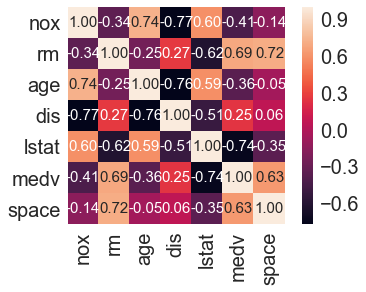

In [159]:
cm_n = np.corrcoef(train_data_mod_n[relevant_columns_n].values.T)
sns.set(font_scale = 2.0)
heat_n = sns.heatmap(cm_n, cbar=True, annot=True, square=True, fmt='.2f', 
                   annot_kws={'size':15}, yticklabels=relevant_columns_n, 
                   xticklabels = relevant_columns_n)
plt.show()

C:\Users\wr225\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


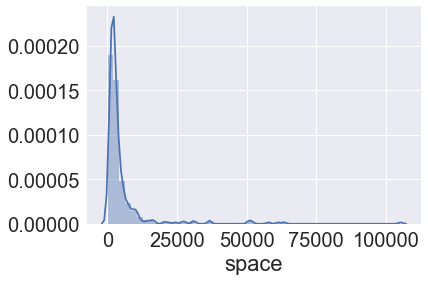

In [160]:
#Let's look at the distribution
sns.distplot(train_data_mod_n['space'])

It is interesting to note that this is the distribution for space, which is the result of multiplying a normally distributed set (rm) by an exponential.This looks like a log normal distribution.

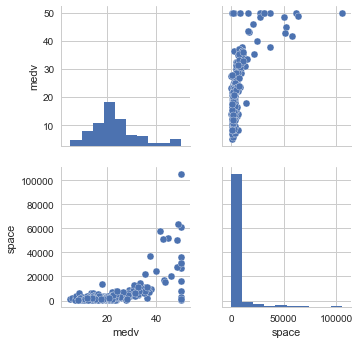

In [161]:
#Let us create a pairplot for medv and space. 
new_rel = ['medv', 'space']
sns.set(style = 'whitegrid', context ='notebook')
cols = new_rel
sns.pairplot(train_data[cols], size = 2.5)
plt.show()

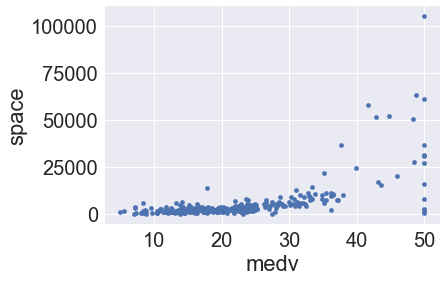

In [185]:
#df3 is just a dataframe with medv and space, used to isolate the two features
#and plot them. 
df3 = train_data_mod_n[np.intersect1d(train_data_mod_n.columns, new_rel)]
df3.plot.scatter(x='medv', y='space')

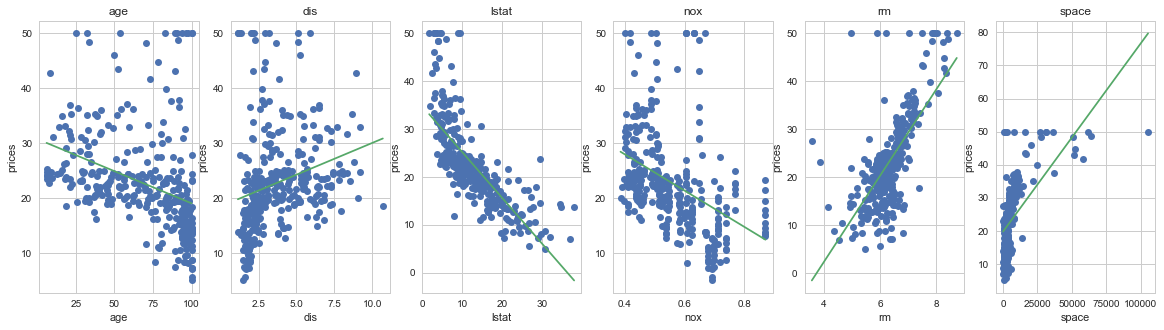

In [163]:
#Although this can be seen as also something we did before, I wanted to 
#plot the line for each of the features against price. 
price = train_data_mod_n['medv'] #these are only the prices
features = train_data_mod_n.drop('medv', axis = 1) #these are the features
plt.figure(figsize=(20, 5))

for i, col in enumerate(features.columns):
    plt.subplot(1, 6, i+1)
    x = train_data_mod_n[col]
    y = price
    plt.plot(x, y, 'o')
    #Now I will make regression lines for each feature.
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

Answer (3): We have sucessfully produced a new feature, called space, to indicate the number of square feet per home. As we can see above, space doesn't have the best fit even though it does have a a correlation above .55. Therefore, I will not be using it to make a prediction.

In [164]:
'''Question 4: Using scikit-learn, we will be making a linear regression model
with the training data. First, we will see what the error for our model is just
with our training data. Then we will apply our model to our testing data.'''

#We want to specify our features from our target. Our target is the price, medv.
#Our features are rm and lstat.
ult_feature = ['rm', 'lstat', 'medv'] #these are the final features we care about
final_train = train_data_mod[np.intersect1d(train_data_mod.columns, ult_feature)]
prices = final_train['medv'] #final prices from training set
features = final_train.drop('medv', axis=1) #features from training set

In [165]:
#Before we can go ahead apply a model to our test data, we should try to see what 
#our error is with our current set.

#lets split the train data.
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(features, prices, test_size = 0.25, random_state = 7)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(249, 2)
(84, 2)
(249,)
(84,)


Please realize that this is only from the train data. Although we are provided a seperate test set to use our trained model on, it is valuable to use our current training data to visualize the accuracy of our selected model. 

Text(0.5,1,'Prices vs Predicted prices')

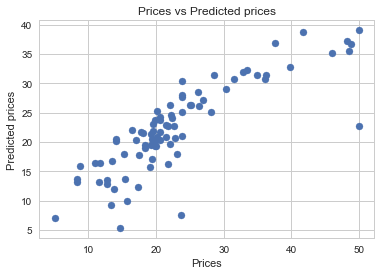

In [170]:
#Now, lets apply a linear regression model.
#X = features
#Y = prices
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test) #make a prediction

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")

In [171]:
#Let us calculate the mean square error and the r^2 score (correleation)
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred) #mean squared error
score = r2_score(Y_test, Y_pred) #R^2 coefficient of determination

print('The mean squared error is ' + str(mse))
print('The R^2 coefficient of determination is ' + str(score))

The mean squared error is 31.109873818462113
The R^2 coefficient of determination is 0.6883900864201555


That isn't the best mean squared error. The ideal mean squared error is low, but this is fairly high. That means our model is a fairly bad model, despite our correlations. The R^2 score is also pretty bad at .68. The best score is 1.0, but that perfection may not even allow generalizations. This means that linear regression may not be the best model to use for this set of data.  

In [172]:
#Let's test using the testing set provided. Now, given that we have assessed the
#accuracy of our linear model (which is fairly low), we can make predictions for
#our testing set.

testmod = ['rm', 'lstat'] #desired features from test dataset.
X_train = features #same as before
X_test = test_data[np.intersect1d(test_data.columns, testmod)] #from our test set
y_train = prices #same as before
ydict = {'ID':[], "medv":[]} #dictionary to make dataframe for our final dataframe
submission = pd.DataFrame(ydict) #dataframe where we will store our predictions

In [173]:
#Now, let's make predictions.
lm2 = LinearRegression()
lm2.fit(X_train, y_train) #fit our train data 
predictions = lm2.predict(X_test) #make our housing price predictions! 
print(predictions)
submission['ID'] = test_data['ID']
submission['medv'] = predictions

[32.86969808 28.37416174 17.95248333  8.21025476 18.47010917 19.99614843
 20.92513822 18.60094726 16.86135329 19.0319149  23.71248042 25.13291889
 11.23963017 16.15629152 22.99063269 21.40165202 23.17888875 30.29270575
  6.48922398 28.72741983 23.26300321 27.50458273 23.33825715 22.99735089
 22.71823537 23.08056185 26.75216303 26.28833161 26.49694059 28.39000489
 37.10831039 36.3012148  32.59036219 22.40444907 18.1295823  22.10266202
 18.60580962 18.91037805 18.97511396 19.88453938 15.84743369 23.66140603
 24.20902136 20.19332634 14.67380559  9.71085837  5.04242432 16.91238361
 18.02045566 16.8499145  20.56482184 31.30942877 37.29555277 23.96094058
 18.54667281 21.79720736 29.42180455 36.96611688 33.33958182 31.60827065
 31.48683148 35.56817841 16.75077997 11.28552119 18.14166969 18.20154325
 24.3556633  26.4783506  17.67065731 24.62091419 27.98811847 35.41106251
 33.18765883 33.26284666 27.8706602  27.82376026 22.00365198 15.6109555
 24.12616775 32.07420508 25.8944999  22.99195965 34.

In [174]:
#Let's see if we have a properly formatted dataframe
submission.head()

,ID,medv
0,3,32.869698
1,6,28.374162
2,8,17.952483
3,9,8.210255
4,10,18.470109


In [175]:
#Convert dataframe to csv file for submission
submission.to_csv(r'C:\Users\wr225\Downloads\submission.csv')

C:\Users\wr225\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


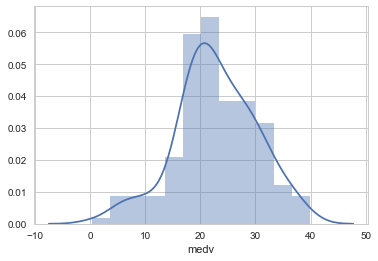

In [176]:
#Let's look at the distribution of data for our submission
sns.distplot(submission['medv'])

In [178]:
#Now, we want to plot our predictions. The best way to do this is to make
#a new dataframe with the test data frame and the new predicted values.

test2_data = test_data
test2_data['medv'] = predictions
test2_data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,32.869698
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.374162
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,17.952483
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,8.210255
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.470109


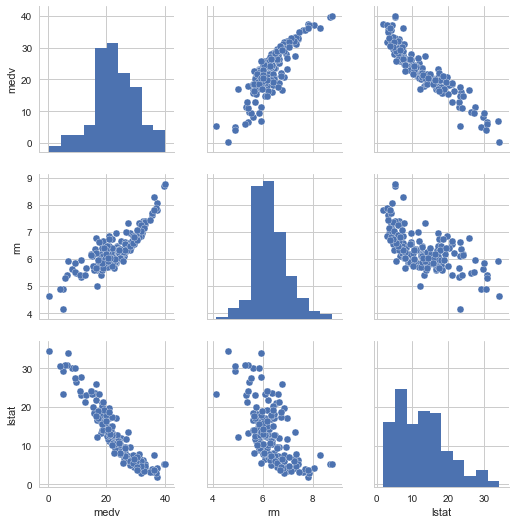

In [181]:
#Let's plot this new medv column against relevant features rm and lstat

test_rel = ['medv', 'rm', 'lstat']
sns.set(style = 'whitegrid', context ='notebook')
cols2 = test_rel
sns.pairplot(test2_data[cols2], size = 2.5)
plt.show()

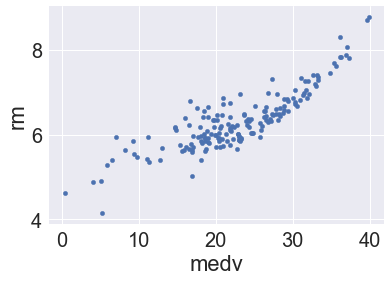

In [188]:
#We can view them inidvidually
test2_data.plot.scatter(x = 'medv', y = 'rm')

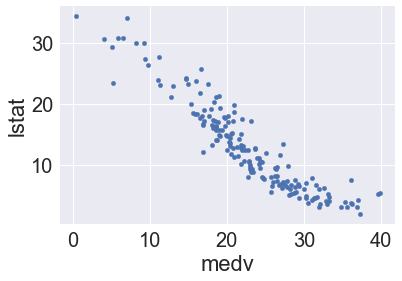

In [189]:
test2_data.plot.scatter(x = 'medv', y = 'lstat')

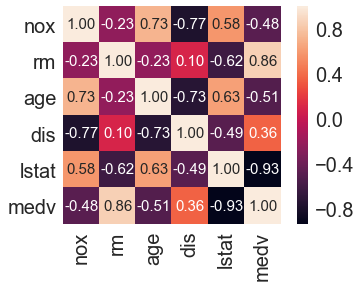

In [182]:
#Let us revisit the initially relevant features before we narrowed down to rm 
#and lstat and find the correlations for them again. 

cm_n2 = np.corrcoef(test2_data[relevant_columns].values.T)
sns.set(font_scale = 2.0)
heat_n2 = sns.heatmap(cm_n2, cbar=True, annot=True, square=True, fmt='.2f', 
                   annot_kws={'size':15}, yticklabels=relevant_columns, 
                   xticklabels = relevant_columns)
plt.show()

Answer (4): Above, you can see the designing of a linear regression model, testing of its general accuracy, and application of it to our testing data set. The medv data for our submission seems to be normally distributed for the most part (may even be weibull distribution). The plots for medv against lstat and rm shown above are seemingly very linear. Additionally, the correlations between medv and lstat and medv and rm are much higher in our testing set now after fitting. Ideally, they should be similar to our training data set correlations. More models need to be tested, possibly using decision trees. The final results are stored in a CSV file.  